# p-value estimation of clones in clusters

In [114]:
import numpy as np
import pandas as pd

In [115]:
df_F = pd.read_csv("../data/laks/scope/F.csv", index_col=0)
df_F

,10:100129846:C:A,10:100185101:A:G,10:100209326:T:C,10:100283942:C:T,10:10086005:G:T,10:100873589:A:T,10:101108222:C:A,10:101108223:T:C,10:101427318:G:C,10:101884473:T:A,...,X:97291714:A:T,X:97396419:C:A,X:97564955:T:C,X:97583306:G:T,X:98177771:A:C,X:98278474:C:A,X:98452192:T:C,X:98700894:C:T,X:99136386:C:T,X:99571629:G:T
clone_id,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,1.0,0.000000,0.833333,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.434783,1.000000,0.000000,0.0,1.000000,0.0,0.000000
B,0.0,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.800000,1.000000,0.000000,0.0,1.000000,0.0,0.000000
C,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.066667,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,1.000000,0.0,0.000000
D,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,0.555556,0.000000,1.0,1.000000,0.0,0.000000
E,1.0,1.0,1.0,0.784314,0.000000,1.000000,0.625000,0.625,0.606061,1.0,...,0.0,0.769231,0.095238,0.000000,0.666667,0.000000,0.0,0.952381,1.0,0.000000
F,1.0,1.0,1.0,1.000000,0.000000,0.190476,1.000000,1.000,0.000000,1.0,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,1.0,0.000000
G,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.842105,0.0,1.000000,0.0,0.909091
H,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.173913,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,1.000000,0.909091,0.0,1.000000,0.0,1.000000
I,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,...,1.0,0.000000,1.000000,0.000000,0.869565,0.250000,0.0,1.000000,0.0,1.000000


In [116]:
df = pd.read_csv("../data/laks/ov2295_snv_counts.csv.gz")
df

/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_38371/1233452112.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/laks/ov2295_snv_counts.csv.gz")


,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921
...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090


In [117]:
df["mutation"] = df["chrom"].astype(str) + ":" + df['coord'].astype(str) + ":" + df['ref'] + ":" +  df['alt']
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,mutation
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T
...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A


In [118]:
df_2 = pd.read_csv("../data/laks/ov2295_clone_clusters.csv.gz")
df = pd.merge(df, df_2, on='cell_id', how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,mutation,clone_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T,NaN
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T,H
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T,H
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T,NaN
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T,I
...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A,D
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A,C
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A,A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A,C


In [119]:
df_cell_cn = pd.read_csv("../scratch/data/ov2295_cell_cn.csv.gz")
df_cell_cn

,cell_id,sample_id,library_id,chr,start,end,reads,copy,state
0,SA922-A90554B-R34-C70,SA922,A90554B,1,1,500000,13,NaN,6
1,SA922-A90554B-R34-C70,SA922,A90554B,1,500001,1000000,442,NaN,6
2,SA922-A90554B-R34-C70,SA922,A90554B,1,1000001,1500000,461,6.672340,6
3,SA922-A90554B-R34-C70,SA922,A90554B,1,1500001,2000000,478,5.211916,6
4,SA922-A90554B-R34-C70,SA922,A90554B,1,2000001,2500000,594,8.384862,6
...,...,...,...,...,...,...,...,...,...
12200991,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57000001,57500000,0,NaN,0
12200992,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,57500001,58000000,0,NaN,0
12200993,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58000001,58500000,0,NaN,0
12200994,SA1090-A96213A-R29-C58,SA1090,A96213A,Y,58500001,59000000,81,NaN,0


In [120]:
binsize = int(df_cell_cn['end'][0])
binsize

500000

In [121]:
df = df.copy()
df['bin'] = df['coord'] // binsize * binsize + 1
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,mutation,clone_id,bin
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T,NaN,19500001
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T,H,19500001
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T,H,19500001
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T,NaN,19500001
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T,I,19500001
...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A,D,62500001
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A,C,62500001
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A,A,62500001
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A,C,62500001


In [122]:
df['chrom'] = df['chrom'].astype(str)
df = pd.merge(df, df_cell_cn, left_on=['cell_id', 'chrom', 'bin'], right_on=['cell_id', 'chr', 'start'], how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,mutation,clone_id,bin,sample_id_y,library_id,chr,start,end,reads,copy,state
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,1:19671432:C:T,NaN,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,1:19671432:C:T,H,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,1:19671432:C:T,H,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,1:19671432:C:T,NaN,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,1:19671432:C:T,I,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,5:62716827:T:A,D,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,5:62716827:T:A,C,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,5:62716827:T:A,A,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,5:62716827:T:A,C,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1


In [123]:
df_cell_snv = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/scratch/data/ov2295_snv_counts.csv.gz", low_memory=False)
df_cell_snv

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921
...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090


In [124]:
df = df_cell_snv
df["bin_start"] = df["coord"] // binsize * binsize + 1
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id,bin_start
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001
...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001


In [125]:
df = pd.merge(df, df_cell_cn, left_on=['cell_id', 'chrom', 'bin_start'], right_on=['cell_id', 'chr', 'start'], how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,sample_id_y,library_id,chr,start,end,reads,copy,state
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1


In [126]:
df["mutation"] = df["chrom"].astype(str) + ":" + df["coord"].astype(str) + ":" + df["ref"] + ":" + df["alt"]
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,sample_id_y,library_id,chr,start,end,reads,copy,state,mutation
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A


In [127]:
df_cell_clusters = pd.read_csv("/Users/samin/workspace/scWGS-Tumor-Phylogeny/scratch/data/ov2295_clone_clusters.csv.gz")
df_cell_clusters

,cell_id,clone_id
0,SA1090-A96213A-R20-C09,C
1,SA1090-A96213A-R20-C11,C
2,SA1090-A96213A-R20-C19,C
3,SA1090-A96213A-R20-C24,C
4,SA1090-A96213A-R20-C27,C
...,...,...
886,SA922-A90554B-R35-C24,F
887,SA922-A90554B-R35-C25,F
888,SA922-A90554B-R35-C37,F
889,SA922-A90554B-R35-C40,F


In [128]:
df = pd.merge(df, df_cell_clusters, on='cell_id', how='left')
df

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,sample_id_y,library_id,chr,start,end,reads,copy,state,mutation,clone_id
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T,NaN
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T,H
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T,H
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,SA921,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T,NaN
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,SA921,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A,D
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A,C
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A,A
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,SA1090,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A,C


In [129]:
%load_ext autoreload
%autoreload 2

In [130]:
import sys
sys.path.append("..")

In [131]:
df_gt = df.copy()

In [132]:
min_copy_number = 0
max_copy_number = 11

min_copy_number, max_copy_number

(0, 11)

In [189]:
import numpy as np


def get_alt_and_total(df, clone_labels):

    clusters = list("ABCDEFGHI")
    clones = sorted(clone_labels['clone'].unique().tolist())


    n_clusters = len(clusters)
    n_clones = max(clones) + 1

    cluster_to_idx = {c: i for i, c in enumerate(clusters)}
    clone_to_idx = {c: c for i, c in enumerate(clones)}

    alts = np.zeros((max_copy_number + 1, n_clusters, n_clones), dtype=np.int32)
    totals = np.zeros_like(alts)

    for _, row in df.iterrows():
        state = int(row['state'])
        if 1 <= state <= max_copy_number:
            try:
                ci = cluster_to_idx.get(row['clone_id'])
                cj = clone_to_idx.get(row['clone'])
                if ci is not None and cj is not None:
                    alts[state, ci, cj] += row['alt_counts']
                    totals[state, ci, cj] += row['total_counts']
            except Exception as e:
                print(e)
                print(row)
    
    return totals, alts


In [190]:
import seaborn as sns
import matplotlib.patches as patches
from scipy.stats import binom, betabinom


def hypothesis_test(alts, totals, dispersion_param=300, error_rate=0.01):

    pvals = np.ones_like(alts, dtype=np.float64)  # fill with 1s by default
    
    for copy_number in range(1, max_copy_number + 1):
        alt = alts[copy_number]
        total = totals[copy_number]

        # Effective success probability after accounting for error
        true_p = 1.0 / copy_number
        p_eff = true_p * (1 - error_rate)

        # Beta-binomial parameters
        ado_alpha = p_eff * dispersion_param
        ado_beta = dispersion_param * (1 - p_eff)

        # Compute p-values (vectorized)
        pvals_slice = betabinom.cdf(alt, total, ado_alpha, ado_beta)
        pvals[copy_number] = pvals_slice

    return pvals


In [191]:
import numpy as np
from scipy.stats import combine_pvalues

def combine_weighted_pvalues(pvals, totals, eps=1e-15):
    """
    Combine p-values across copy numbers for each cluster-clone pair using weighted Stouffer.
    
    Parameters
    ----------
    pvals : np.ndarray
        3D array [copy_number, n_clusters, n_clones] of p-values
    totals : np.ndarray
        3D array [copy_number, n_clusters, n_clones] of weights (e.g., total_counts)
    eps : float
        Small value to clip p-values away from 0 or 1 to avoid infinities
    
    Returns
    -------
    combined : np.ndarray
        2D array [n_clusters, n_clones] of combined p-values
    """
    
    n_states, n_clusters, n_clones = pvals.shape
    combined = np.ones((n_clusters, n_clones))
    
    start_copy_number = 2  # skip 0 if you’re indexing by copy_number
    
    for i in range(n_clusters):
        for j in range(n_clones):
            pvals_ij = pvals[start_copy_number:, i, j]
            weights_ij = totals[start_copy_number:, i, j]

            # Mask valid entries with finite p-values and positive weights
            mask = np.isfinite(pvals_ij) & (weights_ij > 0)
            if np.any(mask):
                # Clip p-values to avoid -inf/+inf
                pvals_safe = np.clip(pvals_ij[mask], eps, 1 - eps)
                
                # Weighted Stouffer combination
                _, p_comb = combine_pvalues(
                    pvals_safe,
                    method='stouffer',
                    weights=weights_ij[mask]
                )
                combined[i, j] = p_comb
            else:
                combined[i, j] = np.nan
    return combined


# Run p-value for SCOPE

In [308]:
INSTANCE_STR = "k_17_t_0.75_f_0.2" 

kmeans_labels = pd.read_csv(f"../data/laks/scope/reclustered_labels/filtered/{INSTANCE_STR}.csv", index_col=0)
kmeans_labels.loc[kmeans_labels['clone'] == 11, 'clone'] = 2
kmeans_labels

,mutation,clone
0,10:100129846:C:A,4
1,10:100185101:A:G,4
2,10:100209326:T:C,2
3,10:100283942:C:T,4
4,10:10086005:G:T,6
...,...,...
14063,X:98278474:C:A,7
14064,X:98452192:T:C,5
14065,X:98700894:C:T,2
14066,X:99136386:C:T,4


In [289]:
kmeans_labels['clone'].unique()

array([ 4,  2,  6,  1, 13,  5,  9,  0,  3, 15,  7, 10])

In [290]:
kmeans_labels['clone'].value_counts()

clone
4     3314
2     2816
0     2781
1     1218
3     1112
6      773
5      651
13     378
10     356
7      279
9      250
15     140
Name: count, dtype: int64

In [291]:
df_scope = pd.merge(df_gt, kmeans_labels, on='mutation', how='left')
df_scope

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,...,library_id,chr,start,end,reads,copy,state,mutation,clone_id,clone
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,...,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T,NaN,1
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,...,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T,H,1
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,...,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T,H,1
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,...,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T,NaN,1
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,...,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T,I,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,...,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A,D,4
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,...,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A,C,4
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,...,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A,A,4
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,...,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A,C,4


In [292]:
total_scope, alt_scope = get_alt_and_total(df_scope, kmeans_labels)

In [293]:
import sys
sys.path.append('..')

In [294]:
from src.phylogeny_utils import *

In [295]:
SOLUTION = 6
SCOPE_OUT_PATH = f"../data/laks/scope/outputs/filtered/{INSTANCE_STR}"

In [296]:
X = pd.read_csv(f"{SCOPE_OUT_PATH}/X/solution_{SOLUTION}.csv", index_col=0)
G = pd.read_csv(f"{SCOPE_OUT_PATH}/G/solution_{SOLUTION}.csv", index_col=0)
B = pd.read_csv(f"{SCOPE_OUT_PATH}/B/solution_{SOLUTION}.csv", index_col=0)

B.columns = B.columns.astype(int)
G.columns = G.columns.astype(int)

/Users/samin/workspace/scWGS-Tumor-Phylogeny/notebooks/../src/phylogeny_utils.py:180: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


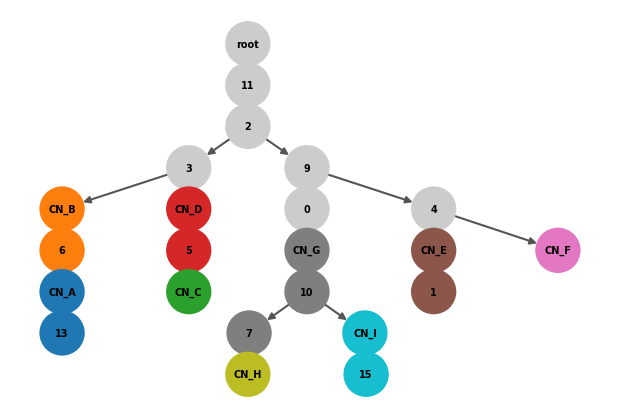

In [297]:
solT_mut, _ = generate_perfect_phylogeny(B)
fixed_T = add_clusters_to_clonal_T(solT_mut, X, G, B)

draw_clone_tree(fixed_T)

In [298]:
row_cols = []
import string
for i, cluster in enumerate(string.ascii_uppercase[:9], start=1):
    for j in range(17):
        if not fixed_T.has_node(j): continue
        if nx.has_path(fixed_T, j, f"CN_{cluster}"):
            # print(cluster, j)
            row_cols.append((i - 1, j))

print(row_cols)

[(0, 2), (0, 3), (0, 6), (0, 11), (1, 2), (1, 3), (1, 11), (2, 2), (2, 3), (2, 5), (2, 11), (3, 2), (3, 3), (3, 11), (4, 2), (4, 4), (4, 9), (4, 11), (5, 2), (5, 4), (5, 9), (5, 11), (6, 0), (6, 2), (6, 9), (6, 11), (7, 0), (7, 2), (7, 7), (7, 9), (7, 10), (7, 11), (8, 0), (8, 2), (8, 9), (8, 10), (8, 11)]


In [299]:
pvals = hypothesis_test(alt_scope, total_scope)

In [300]:
for copy_number in range(1, max_copy_number):
    for row, col in row_cols:
        is_rejected = pvals[copy_number, row, col] < 0.05
        if is_rejected:
            print(row, col, "Copy Number:", copy_number, "\tCN:", chr(ord('A') + row), "\tCluster:", col, "\tp", 
                  total_scope[copy_number, row, col], pvals[copy_number, row, col],
                   "\tX" if is_rejected else "")

0 2 Copy Number: 1 	CN: A 	Cluster: 2 	p 5462 2.7737308067793815e-08 	X
0 3 Copy Number: 1 	CN: A 	Cluster: 3 	p 1938 3.3388523455888835e-10 	X
0 6 Copy Number: 1 	CN: A 	Cluster: 6 	p 1776 2.0490116278410617e-09 	X
1 2 Copy Number: 1 	CN: B 	Cluster: 2 	p 4085 1.0690825421678813e-08 	X
1 3 Copy Number: 1 	CN: B 	Cluster: 3 	p 1630 7.66564104783997e-09 	X
2 2 Copy Number: 1 	CN: C 	Cluster: 2 	p 4990 7.432438770122251e-14 	X
2 3 Copy Number: 1 	CN: C 	Cluster: 3 	p 1825 5.1741549947362795e-09 	X
2 5 Copy Number: 1 	CN: C 	Cluster: 5 	p 1342 1.0420897842540303e-23 	X
3 2 Copy Number: 1 	CN: D 	Cluster: 2 	p 6000 7.907162719728423e-17 	X
3 3 Copy Number: 1 	CN: D 	Cluster: 3 	p 2277 4.4271972907467534e-13 	X
4 2 Copy Number: 1 	CN: E 	Cluster: 2 	p 72 2.091747116542396e-06 	X
4 4 Copy Number: 1 	CN: E 	Cluster: 4 	p 80 0.005522350063096596 	X
4 9 Copy Number: 1 	CN: E 	Cluster: 9 	p 1 0.010000000000002465 	X
5 2 Copy Number: 1 	CN: F 	Cluster: 2 	p 30 0.043021594388861585 	X
5 4 Copy Num

In [301]:
pvals_scope_combined = combine_weighted_pvalues(pvals, total_scope)

In [302]:
# pvals_scope_combined[:, 8]

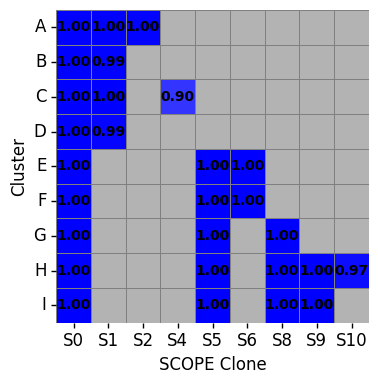

In [325]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "legend.title_fontsize": 12,
    "axes.linewidth": 1,  # thin axes
    "lines.linewidth": 1, # thin box lines
    "grid.color": "none",  # no grid
    "xtick.major.width": 1,
    "ytick.major.width": 1,
})

# Example p-value DataFrame
df = pd.DataFrame(pvals_scope_combined, index=list("ABCDEFGHI"))


# Formatted annotations (human-readable)
def format_pval(p, threshold=0.01):
    if p < threshold:
        return f"<{threshold:.2f}"
    else:
        return f"{p:.2f}"


# row_cols = list of allowed (row_index, col_index) pairs
row_cols_set = set(row_cols)

# Create mask: True for cells to **hide** (gray out)
mask = np.ones(df.shape, dtype=bool)
for i, j in row_cols_set:
    if i < df.shape[0] and j < df.shape[1]:  # safety check
        mask[i, j] = False  # show these cells

mask_df = pd.DataFrame(mask, index=df.index, columns=df.columns)
# col_order = [2, 3, 6, 13, 5, 9, 4, 1, 0, 10, 7, 15]
col_order = [2, 3, 6, 5, 9, 4, 0, 10, 7]
df = df.reindex(columns=col_order)
mask_df = mask_df.reindex(columns=col_order)
mask = mask_df.to_numpy()

df_formatted = df.map(format_pval)


cmap = LinearSegmentedColormap.from_list("red_white_blue", ["red", "white", "blue"])
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    df, 
    annot=df_formatted, 
    fmt='',
    cmap=cmap,
    mask=mask,             # mask cells not in row_cols
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,        # optional grid lines
    linecolor='gray',
    vmin=0,              # force colormap to span 0->1
    vmax=1,
    annot_kws={"weight": "bold", "fontsize": 10, 'color': 'black'},
    cbar=False,
)

mask = np.flip(mask, axis=0)
plt.imshow( mask, cmap=plt.cm.Greys, alpha=mask * 0.3, zorder=-1, extent=[0, df.shape[1], 0, df.shape[0]] )

# plt.gca().set_xticklabels([f"S{i}" for i in range(df.shape[1])])
plt.gca().set_xticklabels([f"S{i}" for i in range(12) if i not in [3, 7, 11]])

plt.yticks(rotation=0)
plt.xlabel("SCOPE Clone")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig(f"{SCOPE_OUT_PATH}/p-values.png", dpi=600, bbox_inches='tight',pad_inches=0.2)


# Run p-value for Phertilizer

In [334]:
snv_clusters = pd.read_csv("../phertilizer-outputs/laks/SNV_clusters.csv")
snv_clusters['mutation'] = snv_clusters['mutation'].str.split('_').str[1]
snv_clusters.rename(columns={'cluster': 'clone'}, inplace=True)
snv_clusters

,clone,mutation
0,7,10:100129846:C:A
1,7,10:100185101:A:G
2,0,10:100209326:T:C
3,7,10:100283942:C:T
4,5,10:10086005:G:T
...,...,...
13827,2,X:98278474:C:A
13828,4,X:98452192:T:C
13829,0,X:98700894:C:T
13830,7,X:99136386:C:T


In [335]:
df_phertilizer = pd.merge(df_gt, snv_clusters, on='mutation', how='left')
# df_phertilizer['clone'] = df_phertilizer['clone'].astype(int)
df_phertilizer

,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,...,library_id,chr,start,end,reads,copy,state,mutation,clone_id,clone
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,...,A90554A,1,19500001,20000000,2,1.000000,1,1:19671432:C:T,NaN,8.0
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,...,A90554A,1,19500001,20000000,776,1.944033,2,1:19671432:C:T,H,8.0
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,...,A90554A,1,19500001,20000000,854,2.325511,2,1:19671432:C:T,H,8.0
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,...,A90554A,1,19500001,20000000,663,1.979604,2,1:19671432:C:T,NaN,8.0
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,...,A90554A,1,19500001,20000000,530,1.829550,2,1:19671432:C:T,I,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,...,A96213A,5,62500001,63000000,209,0.988248,1,5:62716827:T:A,D,7.0
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,...,A96213A,5,62500001,63000000,384,0.924362,1,5:62716827:T:A,C,7.0
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,...,A96213A,5,62500001,63000000,456,1.219741,1,5:62716827:T:A,A,7.0
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,...,A96213A,5,62500001,63000000,269,1.061080,1,5:62716827:T:A,C,7.0


In [336]:
df_phertilizer['clone']

0          8.0
1          8.0
2          8.0
3          8.0
4          8.0
          ... 
3800279    7.0
3800280    7.0
3800281    7.0
3800282    7.0
3800283    7.0
Name: clone, Length: 3800284, dtype: float64

In [337]:
total_phertilizer, alt_phertilizer = get_alt_and_total(df_phertilizer, snv_clusters)


In [338]:
clonal_relations = [
    ('A', [0, 1, 3, 5, 6]), 
    ('B', [0, 1, 3, 5]), 
    ('C', [0, 1, 3, 4]), 
    ('D', [0, 1, 3, 4]), 
    ('E', [0, 7, 8]), 
    ('F', [0, 7, 9]), 
    ('G', [0, 1, 2]), 
    ('H', [0, 1, 2]), 
    ('I', [0, 1, 2]), 
]

row_cols_phert = []
for cluster, clones in clonal_relations:
    for clone in clones:
        row_cols_phert.append((ord(cluster) - ord('A'), clone))

row_cols_phert

[(0, 0),
 (0, 1),
 (0, 3),
 (0, 5),
 (0, 6),
 (1, 0),
 (1, 1),
 (1, 3),
 (1, 5),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (3, 0),
 (3, 1),
 (3, 3),
 (3, 4),
 (4, 0),
 (4, 7),
 (4, 8),
 (5, 0),
 (5, 7),
 (5, 9),
 (6, 0),
 (6, 1),
 (6, 2),
 (7, 0),
 (7, 1),
 (7, 2),
 (8, 0),
 (8, 1),
 (8, 2)]

In [339]:
pvals_phertilizer = hypothesis_test(alt_phertilizer, total_phertilizer, dispersion_param=200)

In [340]:
for copy_number in range(1, max_copy_number):
    for row, col in row_cols_phert:
        is_rejected = pvals_phertilizer[copy_number, row, col] < 0.05
        if is_rejected:
            print("Copy Number:", copy_number, "\tCN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals_phertilizer[copy_number, row, col], "\tTotal Reads", total_phertilizer[copy_number, row, col], "\tX" if is_rejected else "")

Copy Number: 1 	CN: A 	Cluster: 0 	p 1.0544959765116286e-21 	Total Reads 6653 	X
Copy Number: 1 	CN: A 	Cluster: 1 	p 6.034515269289065e-32 	Total Reads 177 	X
Copy Number: 1 	CN: A 	Cluster: 3 	p 5.6458696043449374e-08 	Total Reads 2328 	X
Copy Number: 1 	CN: A 	Cluster: 5 	p 4.67547160771244e-07 	Total Reads 1757 	X
Copy Number: 1 	CN: A 	Cluster: 6 	p 2.240659889389359e-15 	Total Reads 411 	X
Copy Number: 1 	CN: B 	Cluster: 0 	p 1.2950329756074633e-21 	Total Reads 4978 	X
Copy Number: 1 	CN: B 	Cluster: 1 	p 2.0630357343090223e-18 	Total Reads 88 	X
Copy Number: 1 	CN: B 	Cluster: 3 	p 1.877079462163875e-07 	Total Reads 1867 	X
Copy Number: 1 	CN: B 	Cluster: 5 	p 5.4521923021921665e-24 	Total Reads 1341 	X
Copy Number: 1 	CN: C 	Cluster: 0 	p 1.6015520671159487e-21 	Total Reads 5849 	X
Copy Number: 1 	CN: C 	Cluster: 1 	p 5.56580369086615e-26 	Total Reads 121 	X
Copy Number: 1 	CN: C 	Cluster: 3 	p 4.6454498577125525e-10 	Total Reads 2210 	X
Copy Number: 1 	CN: C 	Cluster: 4 	p 3.0

# Combined p-values

In [341]:
pvals_phertilizer_combined = combine_weighted_pvalues(pvals_phertilizer, total_phertilizer)

In [342]:
for row, col in row_cols_phert:
    is_rejected = pvals_phertilizer_combined[row, col] < 0.05
    if is_rejected:
        print("CN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals_phertilizer_combined[row, col], "\tX" if is_rejected else "")

CN: A 	Cluster: 1 	p 0.04209133133144593 	X
CN: F 	Cluster: 9 	p 4.717593819656225e-09 	X


In [343]:
for row, col in row_cols:
    is_rejected = pvals_scope_combined[row, col] < 0.05
    if is_rejected:
        print("CN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals_scope_combined[row, col], "\tX" if is_rejected else "")

# row_cols

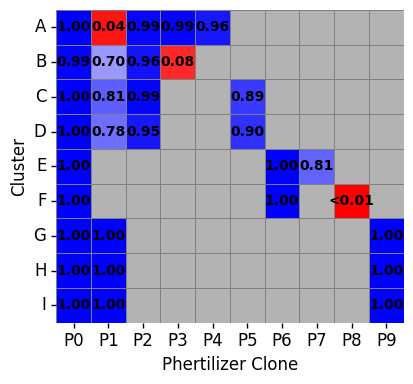

In [353]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "legend.title_fontsize": 12,
    "axes.linewidth": 1,  # thin axes
    "lines.linewidth": 1, # thin box lines
    "grid.color": "none",  # no grid
    "xtick.major.width": 1,
    "ytick.major.width": 1,
})

# Example p-value DataFrame
df = pd.DataFrame(pvals_phertilizer_combined, index=list("ABCDEFGHI"))


# Formatted annotations (human-readable)
def format_pval(p, threshold=0.01):
    if p < threshold:
        return f"<{threshold:.2f}"
    else:
        return f"{p:.2f}"


# row_cols = list of allowed (row_index, col_index) pairs
row_cols_set = set(row_cols_phert)

# Create mask: True for cells to **hide** (gray out)
mask = np.ones(df.shape, dtype=bool)
for i, j in row_cols_set:
    if i < df.shape[0] and j < df.shape[1]:  # safety check
        mask[i, j] = False  # show these cells

mask_df = pd.DataFrame(mask, index=df.index, columns=df.columns)
col_order = [0, 1, 3, 5, 6, 4, 7, 8, 9, 2]
# col_order = [0, 1, 3, 5, 7]
df = df.reindex(columns=col_order)
mask_df = mask_df.reindex(columns=col_order)
mask = mask_df.to_numpy()

df_formatted = df.map(format_pval)


cmap = LinearSegmentedColormap.from_list("red_white_blue", ["red", "white", "blue"])
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(
    df, 
    annot=df_formatted, 
    fmt='',
    cmap=cmap,
    mask=mask,             # mask cells not in row_cols
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,        # optional grid lines
    linecolor='gray',
    vmin=0,              # force colormap to span 0->1
    vmax=1,
    annot_kws={"weight": "bold", "fontsize": 10, 'color': 'black'},
    cbar=False,
)

mask = np.flip(mask, axis=0)
plt.imshow( mask, cmap=plt.cm.Greys, alpha=mask * 0.3, zorder=-1, extent=[0, df.shape[1], 0, df.shape[0]] )

plt.gca().set_xticklabels([f"P{i}" for i in range(df.shape[1])])
# plt.gca().set_xticklabels([f"P{i}" for i in range(10) if i not in (4, 5, 7, 8, 9)])

plt.yticks(rotation=0)
plt.xlabel("Phertilizer Clone")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig("../phertilizer-outputs/laks/p-values.png", dpi=600, bbox_inches='tight',pad_inches=0.2)
plt.savefig("../phertilizer-outputs/laks/p-values.svg")
plt.show()


In [354]:
df

,0,1,3,5,6,4,7,8,9,2
A,0.998024,4.209133e-02,9.872041e-01,9.898229e-01,9.560216e-01,1.388267e-23,1.301583e-27,9.266532e-24,6.332351e-21,2.973695e-27
B,0.992024,6.995722e-01,9.640254e-01,8.122831e-02,1.380508e-18,1.100982e-22,1.049283e-26,9.946799e-24,1.006918e-20,3.373577e-26
C,0.997831,8.145016e-01,9.895100e-01,3.446489e-24,4.693610e-21,8.856762e-01,4.392877e-29,1.409013e-26,8.524209e-23,1.403825e-28
D,0.997587,7.826285e-01,9.537505e-01,1.695565e-24,1.398004e-21,9.025508e-01,1.612103e-29,1.757134e-27,4.175682e-23,7.422586e-29
E,1.000000,1.760551e-39,1.305120e-66,1.648198e-73,8.759143e-61,4.903362e-78,1.000000e+00,8.083507e-01,3.909856e-53,2.153731e-79
F,1.000000,1.788191e-29,1.010287e-63,8.851788e-68,1.207427e-52,4.035525e-67,1.000000e+00,1.014581e-54,4.717594e-09,2.340369e-73
G,1.000000,1.000000e+00,3.557494e-45,2.136090e-45,2.708449e-41,1.005918e-51,1.940652e-46,2.792401e-45,8.270194e-47,1.000000e+00
H,1.000000,1.000000e+00,3.086113e-47,2.510001e-45,1.149735e-36,5.011277e-53,5.201260e-47,1.364489e-45,1.373466e-46,1.000000e+00
I,1.000000,1.000000e+00,1.419365e-48,4.225651e-46,1.116241e-40,1.015596e-50,9.800096e-50,2.943422e-45,7.761767e-48,1.000000e+00


/var/folders/nz/jn74t1g51q10qyclfkkr8cgm0000gq/T/ipykernel_38371/3022828111.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_formatted = df.applymap(format_pval)


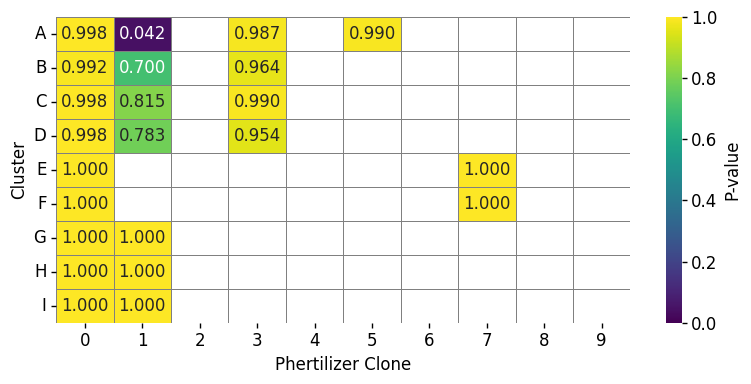

In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example p-value DataFrame
df = pd.DataFrame(pvals_phertilizer_combined, index=list("ABCDEFGHI"))

# Formatted annotations (human-readable)
def format_pval(p, threshold=0.001):
    if p < threshold:
        return f"<{threshold:.3f}"
    else:
        return f"{p:.3f}"

df_formatted = df.applymap(format_pval)

# row_cols = list of allowed (row_index, col_index) pairs
row_cols_set = set(row_cols_phert)

# Create mask: True for cells to **hide** (gray out)
mask = np.ones(df.shape, dtype=bool)
for i, j in row_cols_set:
    if i < df.shape[0] and j < df.shape[1]:  # safety check
        mask[i, j] = False  # show these cells

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    df, 
    annot=df_formatted, 
    fmt='',
    cmap='viridis',
    mask=mask,             # mask cells not in row_cols
    cbar_kws={'label': 'P-value'},
    linewidths=0.5,        # optional grid lines
    linecolor='gray',
    vmin=0,              # force colormap to span 0->1
    vmax=1
)
plt.yticks(rotation=0)
plt.xlabel("Phertilizer Clone")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig("../phertilizer-outputs/laks/p-values.svg")
plt.show()


# Check p-values for Laks' tree

In [254]:
import pandas as pd
import numpy as np

In [255]:
df_tree = pd.read_csv("../data/laks/ov2295_nodes.csv.gz")
df_tree

,variant_id,node,loss,origin,presence,ml_origin,ml_presence,ml_loss
0,10:100129846:C:A,0,0.000000e+00,4.573674e-05,0.000000e+00,0,0,0
1,10:100129846:C:A,1,4.542663e-05,3.979706e-41,3.101192e-07,0,0,0
2,10:100129846:C:A,2,3.080443e-07,3.926630e-41,2.074915e-09,0,0,0
3,10:100129846:C:A,3,2.074915e-09,8.623432e-67,0.000000e+00,0,0,0
4,10:100129846:C:A,4,2.074915e-09,8.588990e-55,0.000000e+00,0,0,0
...,...,...,...,...,...,...,...,...
239151,X:99571629:G:T,12,4.783274e-116,9.932175e-01,6.782464e-03,1,1,0
239152,X:99571629:G:T,13,6.894618e-84,1.015949e-30,1.000000e+00,0,1,0
239153,X:99571629:G:T,14,6.980025e-69,1.003518e-45,1.000000e+00,0,1,0
239154,X:99571629:G:T,15,6.653350e-18,1.052790e-96,1.000000e+00,0,1,0


In [256]:
df_tree_mut_origin = df_tree.loc[df_tree.groupby('variant_id')['origin'].idxmax()].reset_index(drop=True)
df_tree_mut_origin.rename(columns={'variant_id': 'mutation', 'node': 'clone'}, inplace=True)
df_tree_mut_origin['clone'].value_counts()

clone
9     3407
12    3175
0     3023
1     1262
10    1105
2      731
5      509
13     238
3      158
8      131
16      99
11      79
15      43
7       41
14      29
6       27
4       11
Name: count, dtype: int64

In [257]:
df_laks = pd.merge(df_gt, df_tree_mut_origin, on='mutation', how='left')
df_laks


,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,total_counts,sample_id_x,bin_start,...,state,mutation,clone_id,clone,loss,origin,presence,ml_origin,ml_presence,ml_loss
0,1,19671432,C,T,1,0,SA921-A90554A-R03-C03,1,SA921,19500001,...,1,1:19671432:C:T,NaN,10,4.641052e-22,0.991506,0.008494,1,1,0
1,1,19671432,C,T,2,0,SA921-A90554A-R03-C13,2,SA921,19500001,...,2,1:19671432:C:T,H,10,4.641052e-22,0.991506,0.008494,1,1,0
2,1,19671432,C,T,1,0,SA921-A90554A-R03-C21,1,SA921,19500001,...,2,1:19671432:C:T,H,10,4.641052e-22,0.991506,0.008494,1,1,0
3,1,19671432,C,T,2,0,SA921-A90554A-R03-C68,2,SA921,19500001,...,2,1:19671432:C:T,NaN,10,4.641052e-22,0.991506,0.008494,1,1,0
4,1,19671432,C,T,1,0,SA921-A90554A-R04-C10,1,SA921,19500001,...,2,1:19671432:C:T,I,10,4.641052e-22,0.991506,0.008494,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3800279,5,62716827,T,A,1,0,SA1090-A96213A-R27-C49,1,SA1090,62500001,...,1,5:62716827:T:A,D,9,4.334587e-19,0.862315,0.119017,1,1,0
3800280,5,62716827,T,A,1,0,SA1090-A96213A-R30-C14,1,SA1090,62500001,...,1,5:62716827:T:A,C,9,4.334587e-19,0.862315,0.119017,1,1,0
3800281,5,62716827,T,A,1,0,SA1090-A96213A-R30-C15,1,SA1090,62500001,...,1,5:62716827:T:A,A,9,4.334587e-19,0.862315,0.119017,1,1,0
3800282,5,62716827,T,A,1,0,SA1090-A96213A-R33-C10,1,SA1090,62500001,...,1,5:62716827:T:A,C,9,4.334587e-19,0.862315,0.119017,1,1,0


In [258]:
total_laks, alt_laks = get_alt_and_total(df_laks, df_tree_mut_origin)

In [346]:
clonal_relations = [
    ('A', [0, 1, 2, 3]), 
    ('B', [0, 1, 2, 4]), 
    ('C', [0, 1, 5, 6]), 
    ('D', [0, 1, 5, 7]), 
    ('E', [0, 8, 9, 10]), 
    ('F', [0, 8, 9, 11]), 
    ('G', [0, 8, 12, 13, 14]), 
    ('H', [0, 8, 12, 13, 15]), 
    ('I', [0, 8, 12, 16]), 
]

row_cols_laks = []
for cluster, clones in clonal_relations:
    for clone in clones:
        row_cols_laks.append((ord(cluster) - ord('A'), clone))

row_cols_laks

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 4),
 (2, 0),
 (2, 1),
 (2, 5),
 (2, 6),
 (3, 0),
 (3, 1),
 (3, 5),
 (3, 7),
 (4, 0),
 (4, 8),
 (4, 9),
 (4, 10),
 (5, 0),
 (5, 8),
 (5, 9),
 (5, 11),
 (6, 0),
 (6, 8),
 (6, 12),
 (6, 13),
 (6, 14),
 (7, 0),
 (7, 8),
 (7, 12),
 (7, 13),
 (7, 15),
 (8, 0),
 (8, 8),
 (8, 12),
 (8, 16)]

In [347]:
pvals_laks = hypothesis_test(alt_laks, total_laks)

In [348]:
for copy_number in range(1, max_copy_number):
    for row, col in row_cols_laks:
        is_rejected = pvals_laks[copy_number, row, col] < 0.05
        if is_rejected:
            print("Copy Number:", copy_number, "\tCN:", chr(ord('A') + row), "\tCluster:", col, "\tp", pvals_laks[copy_number, row, col], "\tTotal Reads", total_laks[copy_number, row, col], "\tX" if is_rejected else "")

Copy Number: 1 	CN: A 	Cluster: 0 	p 3.1383747720793097e-17 	Total Reads 6013 	X
Copy Number: 1 	CN: A 	Cluster: 1 	p 5.403144074001707e-12 	Total Reads 2348 	X
Copy Number: 1 	CN: A 	Cluster: 2 	p 5.262238542068459e-10 	Total Reads 1564 	X
Copy Number: 1 	CN: A 	Cluster: 3 	p 6.125042302159219e-08 	Total Reads 543 	X
Copy Number: 1 	CN: B 	Cluster: 0 	p 6.533037579778325e-16 	Total Reads 4430 	X
Copy Number: 1 	CN: B 	Cluster: 1 	p 2.8240760680798017e-11 	Total Reads 1889 	X
Copy Number: 1 	CN: B 	Cluster: 2 	p 1.7062430858572618e-28 	Total Reads 1238 	X
Copy Number: 1 	CN: B 	Cluster: 4 	p 4.8642311822806284e-05 	Total Reads 15 	X
Copy Number: 1 	CN: C 	Cluster: 0 	p 2.1347288065073214e-16 	Total Reads 5237 	X
Copy Number: 1 	CN: C 	Cluster: 1 	p 5.08557260020847e-12 	Total Reads 2217 	X
Copy Number: 1 	CN: C 	Cluster: 5 	p 9.292369600690744e-15 	Total Reads 909 	X
Copy Number: 1 	CN: C 	Cluster: 6 	p 4.151916467489974e-24 	Total Reads 187 	X
Copy Number: 1 	CN: D 	Cluster: 0 	p 3.23

In [349]:
pvals_laks_combined = combine_weighted_pvalues(pvals_laks, total_laks)

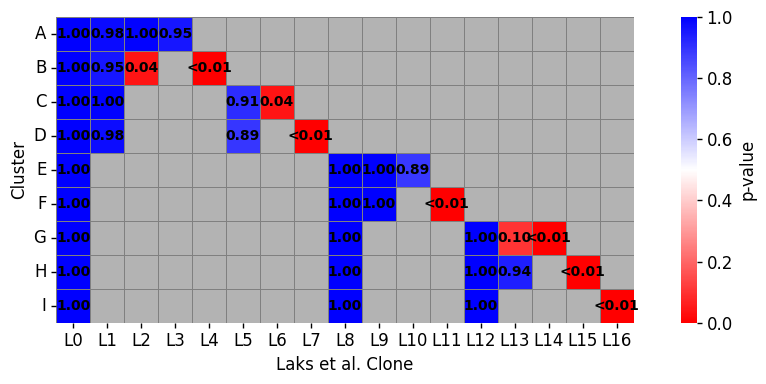

In [355]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Example p-value DataFrame
df = pd.DataFrame(pvals_laks_combined, index=list("ABCDEFGHI"))


# Formatted annotations (human-readable)
def format_pval(p, threshold=0.01):
    if p < threshold:
        return f"<{threshold:.2f}"
    else:
        return f"{p:.2f}"
    
plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "legend.title_fontsize": 12,
    "axes.linewidth": 1,  # thin axes
    "lines.linewidth": 1, # thin box lines
    "grid.color": "none",  # no grid
    "xtick.major.width": 1,
    "ytick.major.width": 1,
})


# row_cols = list of allowed (row_index, col_index) pairs
row_cols_set = set(row_cols_laks)

# Create mask: True for cells to **hide** (gray out)
mask = np.ones(df.shape, dtype=bool)
for i, j in row_cols_set:
    if i < df.shape[0] and j < df.shape[1]:  # safety check
        mask[i, j] = False  # show these cells

mask_df = pd.DataFrame(mask, index=df.index, columns=df.columns)
col_order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
# col_order = [0, 1, 2, 5, 8, 9, 12, 13]
df = df.reindex(columns=col_order)
mask_df = mask_df.reindex(columns=col_order)
mask = mask_df.to_numpy()

df_formatted = df.map(format_pval)


cmap = LinearSegmentedColormap.from_list("red_white_blue", ["red", "white", "blue"])
# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(
    df, 
    annot=df_formatted, 
    fmt='',
    cmap=cmap,
    mask=mask,             # mask cells not in row_cols
    cbar_kws={'label': 'p-value'},
    linewidths=0.5,        # optional grid lines
    linecolor='gray',
    vmin=0,              # force colormap to span 0->1
    vmax=1,
    annot_kws={"weight": "bold", "fontsize": 10, 'color': 'black'}
)

mask = np.flip(mask, axis=0)
plt.imshow( mask, cmap=plt.cm.Greys, alpha=mask * 0.3, zorder=-1, extent=[0, df.shape[1], 0, df.shape[0]] )

plt.gca().set_xticklabels([f"L{i}" for i in range(17)])
# plt.gca().set_xticklabels([f"L{i}" for i in range(17) if i not in [3, 4, 6, 7, 10, 11,  14, 15, 16]])

plt.yticks(rotation=0)
plt.xlabel("Laks et al. Clone")
plt.ylabel("Cluster")
plt.tight_layout()
plt.savefig("../data/laks/laks-p-values.png", dpi=600, bbox_inches='tight',pad_inches=0.2)
plt.savefig("../data/laks/laks-p-values.svg")
plt.show()


In [356]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
A,0.999713,9.795202e-01,9.956031e-01,9.538064e-01,8.719483e-16,1.297027e-24,4.658114e-17,1.354302e-16,5.276660e-18,1.248342e-27,1.830352e-23,1.924280e-18,1.613639e-27,6.735337e-23,5.039404e-19,3.849503e-16,7.102802e-19
B,0.998693,9.543254e-01,4.201438e-02,7.615353e-20,3.216855e-03,1.616516e-23,2.369064e-17,9.277284e-17,1.146198e-18,9.567781e-27,1.889435e-23,2.050489e-16,1.823797e-26,2.125412e-22,2.698728e-18,7.567727e-19,2.870410e-17
C,0.999875,9.950145e-01,5.866451e-25,1.690450e-21,3.810326e-14,9.115404e-01,4.169974e-02,2.327522e-18,3.195505e-21,5.522790e-29,1.221563e-26,8.490385e-21,5.815409e-29,7.684674e-25,1.330648e-18,1.952795e-24,5.279863e-21
D,0.999695,9.753983e-01,2.273443e-25,2.737679e-22,3.343196e-17,8.938536e-01,1.803908e-11,1.331466e-05,3.622329e-21,2.094617e-29,1.037571e-27,4.996343e-21,3.763419e-29,3.661057e-26,3.270550e-18,2.092259e-24,1.400315e-21
E,1.000000,1.513430e-67,8.493659e-72,1.596608e-69,1.635809e-28,2.320904e-76,2.431676e-55,6.139321e-59,1.000000e+00,1.000000e+00,8.899893e-01,8.028893e-47,2.579797e-79,5.556478e-63,4.075995e-58,8.125108e-63,6.907479e-68
F,1.000000,4.482567e-65,2.833461e-66,1.579172e-60,3.580290e-17,1.750021e-65,2.925003e-44,3.242560e-55,1.000000e+00,1.000000e+00,5.168064e-56,4.137092e-07,3.118753e-73,1.639148e-56,9.663539e-52,1.388751e-51,1.608754e-62
G,1.000000,1.256710e-45,1.568050e-45,7.430243e-45,1.657300e-17,4.807674e-55,2.122037e-28,8.034184e-37,1.000000e+00,4.033368e-46,5.222659e-46,7.529054e-45,1.000000e+00,1.029220e-01,3.049432e-11,2.105523e-29,5.290211e-42
H,1.000000,1.130320e-47,9.971717e-46,6.404892e-40,4.853645e-10,7.694068e-56,1.607390e-28,5.517957e-34,1.000000e+00,6.131669e-47,1.533575e-45,1.992315e-47,1.000000e+00,9.377529e-01,3.079107e-36,1.073968e-24,3.708744e-40
I,1.000000,1.231987e-48,6.096224e-46,1.146508e-44,1.340689e-11,8.524758e-54,5.759294e-34,4.651629e-39,1.000000e+00,2.248893e-49,1.255640e-45,1.282044e-50,1.000000e+00,4.551143e-40,2.530109e-32,1.456236e-37,3.289492e-09


## F error

In [214]:
errors = []

for SOLUTION in range(16):

    B = pd.read_csv(f"../data/laks/scope/outputs/filtered/{INSTANCE_STR}/B/solution_{SOLUTION}.csv", index_col=0)
    X = pd.read_csv(f"../data/laks/scope/outputs/filtered/{INSTANCE_STR}/X/solution_{SOLUTION}.csv", index_col=0)
    G = pd.read_csv(f"../data/laks/scope/outputs/filtered/{INSTANCE_STR}/G/solution_{SOLUTION}.csv", index_col=0)
    F_bar = pd.read_csv(f"../data/laks/scope/cell_fractions/filtered/{INSTANCE_STR}/F_bar.csv", index_col=0)


    B.columns = B.columns.astype(int)
    G.columns = G.columns.astype(int)
    F_bar.columns = F_bar.columns.astype(int)
    X.index = X.index.astype(int)

    cn_clusters = G.index.to_list()
    mutations_selected = X[X['0'] > 0.5].index.to_list()

    error = 0

    for cn_cluster in cn_clusters:
        for mutation in mutations_selected:
            if G.loc[cn_cluster, mutation] > 0.5:
                # print(f"Mutation {mutation} gained in CN cluster {cn_cluster}"
                e = 0
            elif B.loc[cn_cluster, mutation] > 0.5:
                e = 1 - F_bar.loc[cn_cluster, mutation]
                # print(f"Mutation {mutation} clonal CN cluster {cn_cluster} {e}")
                error += e
            else:
                e = F_bar.loc[cn_cluster, mutation]
                # print(f"Mutation {mutation} non-clonal CN cluster {cn_cluster} {e}")
                error += e

    print(SOLUTION, error)

    errors.append(error)

0 1.5029658851640266
1 1.5029658851640266
2 1.7493428798168835
3 1.7029658851640268
4 1.6433599738339773
5 1.6433599738339773
6 1.4089487911469327
7 1.5493428798168833
8 1.5493428798168833
9 1.7029658851640268
10 1.8433599738339774
11 1.8433599738339774
12 1.4089487911469327
13 1.608948791146933
14 1.7493428798168835
15 1.608948791146933


In [215]:
np.argsort(errors)

array([ 6, 12,  0,  1,  7,  8, 13, 15,  4,  5,  3,  9,  2, 14, 10, 11])

In [216]:
errors

[np.float64(1.5029658851640266),
 np.float64(1.5029658851640266),
 np.float64(1.7493428798168835),
 np.float64(1.7029658851640268),
 np.float64(1.6433599738339773),
 np.float64(1.6433599738339773),
 np.float64(1.4089487911469327),
 np.float64(1.5493428798168833),
 np.float64(1.5493428798168833),
 np.float64(1.7029658851640268),
 np.float64(1.8433599738339774),
 np.float64(1.8433599738339774),
 np.float64(1.4089487911469327),
 np.float64(1.608948791146933),
 np.float64(1.7493428798168835),
 np.float64(1.608948791146933)]